In [41]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
# Loading dataset 
data = pd.read_csv('C:/Users/mothey/OneDrive - Pfizer/Stevens/train1.csv')
df = pd.read_csv('C:/Users/mothey/OneDrive - Pfizer/Stevens/train2.csv')

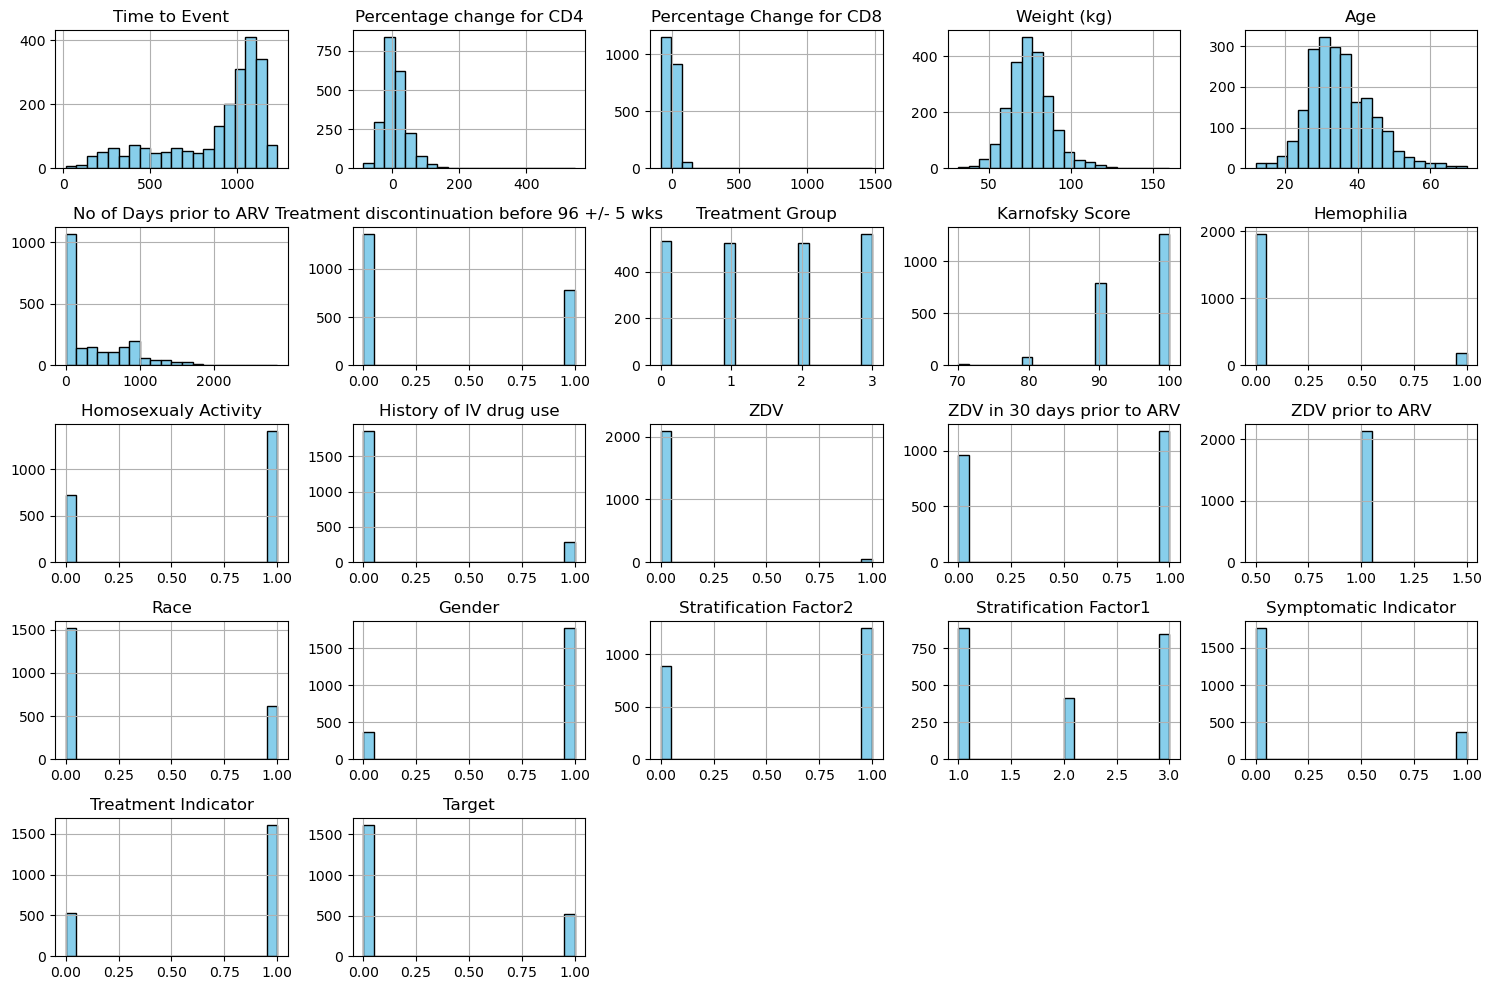

In [45]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create histograms For Numeric Columns
data[numeric_columns].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

# Display the plots
plt.tight_layout()  # Adjusts the layout to avoid overlap
plt.show()


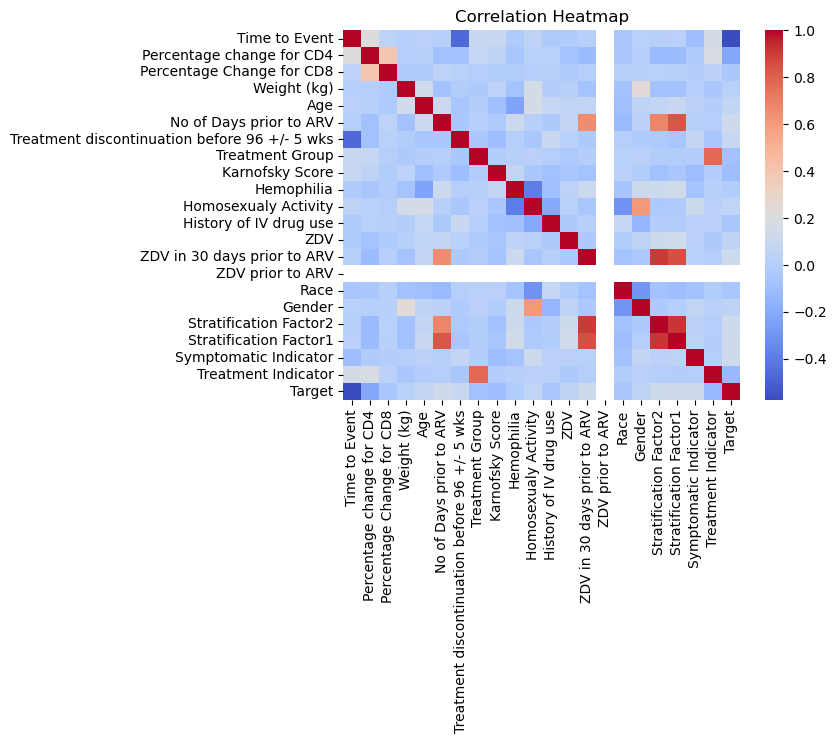

In [46]:
# Compute correlation matrix
correlation = data.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Split the data into features and target
X = data.drop(columns=['Target'])  
y = data['Target']  # Target variable

a = df.drop(columns=['Target'])  
b = df['Target']  # Target variable


In [48]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
A_train, A_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [53]:
# Standardize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

A_train_scaled = scaler.fit_transform(A_train)
A_test_scaled = scaler.transform(A_test)


In [55]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=3)  # Unweighted KNN
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# KNN Model with important features
knn.fit(A_train_scaled, b_train)
b_pred_knn = knn.predict(A_test_scaled)
accuracy_knn_ft = accuracy_score(b_test, b_pred_knn)

In [57]:
# Weighted KNN Model
knn_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance')  # Weighted KNN
knn_weighted.fit(X_train_scaled, y_train)
y_pred_knn_weighted = knn_weighted.predict(X_test_scaled)
accuracy_knn_weighted = accuracy_score(y_test, y_pred_knn_weighted)

# Weighted KNN Model with important features
knn_weighted.fit(A_train_scaled, b_train)
b_pred_knn_weighted = knn_weighted.predict(A_test_scaled)
accuracy_knn_weighted_ft = accuracy_score(b_test, b_pred_knn_weighted)

In [59]:
# CART Model
cart = DecisionTreeClassifier(random_state=42)
cart.fit(X_train, y_train)
y_pred_cart = cart.predict(X_test)
accuracy_cart = accuracy_score(y_test, y_pred_cart)

# CART Model with important features
cart.fit(A_train, b_train)
b_pred_cart = cart.predict(A_test)
accuracy_cart_ft = accuracy_score(b_test, b_pred_cart)

In [61]:
# C4.5 Model
c45_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
c45_model.fit(X_train, y_train)
y_pred_c45 = c45_model.predict(X_test)
accuracy_c45 = accuracy_score(y_test, y_pred_c45)

# C4.5 Model with important features
c45_model.fit(A_train, b_train)
b_pred_c45 = c45_model.predict(A_test)
accuracy_c45_ft = accuracy_score(b_test, b_pred_c45)

In [63]:
# C5.0 Model
c5_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,       # Control tree depth
    min_samples_split=10,  # Minimum samples to split
    min_samples_leaf=5,    # Minimum samples at a leaf node
    random_state=42
)
c5_model.fit(X_train, y_train)
y_pred_c5 = c5_model.predict(X_test)
accuracy_c5 = accuracy_score(y_test, y_pred_c5)


# C5.0 Model with important features
c5_model.fit(A_train, b_train)
b_pred_c5 = c5_model.predict(A_test)
accuracy_c5_ft = accuracy_score(b_test, b_pred_c5)


In [65]:
# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)


# Naive Bayes Model with important features
nb.fit(A_train_scaled, b_train)
b_pred_nb = nb.predict(A_test_scaled)
accuracy_nb_ft = accuracy_score(b_test, b_pred_nb)

In [67]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


# Random Forest Model with important features
rf.fit(A_train, b_train)
b_pred_rf = rf.predict(A_test)
accuracy_rf_ft = accuracy_score(b_test, b_pred_rf)

In [69]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [71]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns


In [73]:
# Display feature importance as a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [75]:
# Print the feature importance DataFrame
print(feature_importance_df)

                                          Feature  Importance
0                                   Time to Event    0.413188
1                       Percentage change for CD4    0.114927
2                       Percentage Change for CD8    0.077648
3                                     Weight (kg)    0.069269
4                                             Age    0.064457
5                         No of Days prior to ARV    0.056829
6   Treatment discontinuation before 96 +/- 5 wks    0.049732
7                                 Treatment Group    0.024849
8                                 Karnofsky Score    0.018685
19                          Symptomatic Indicator    0.017190
10                           Homosexualy Activity    0.013467
15                                           Race    0.013263
18                         Stratification Factor1    0.012223
11                         History of IV drug use    0.010022
16                                         Gender    0.009740
13      

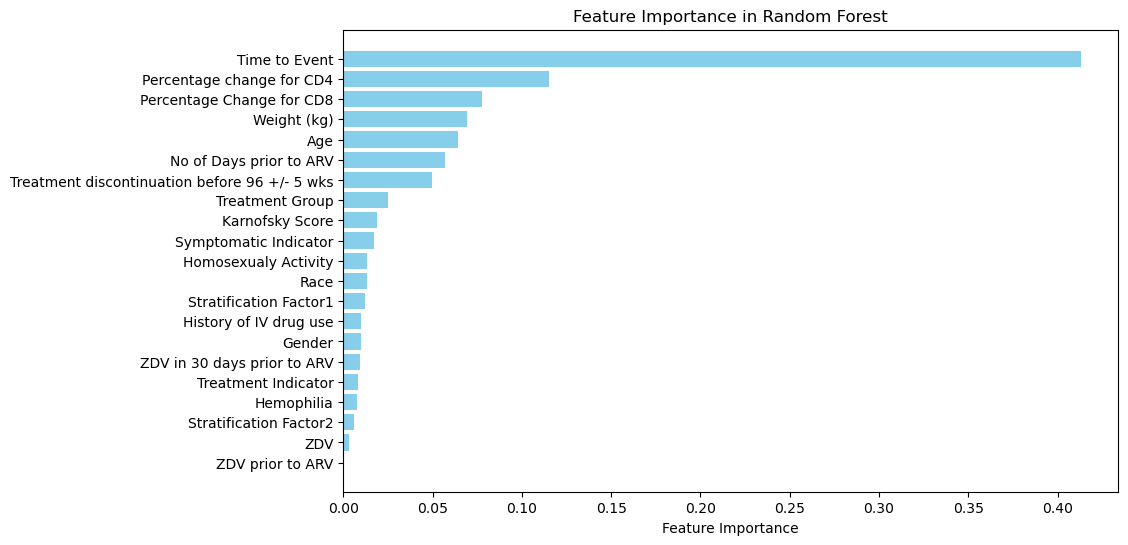

In [77]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [79]:
# Print accuracy rates
print("Accuracy of Unweighted KNN:", accuracy_knn)
print("Accuracy of Weighted KNN:", accuracy_knn_weighted)
print("Accuracy of CART:", accuracy_cart)
print("Accuracy of C4.5-like model (Decision Tree with Entropy):", accuracy_c45)
print("Accuracy of C5.0-like model (Decision Tree with Entropy):", accuracy_c5)
print("Accuracy of Naive Bayes:", accuracy_nb)
print("Accuracy of Random Forest:", accuracy_rf)

Accuracy of Unweighted KNN: 0.8154205607476636
Accuracy of Weighted KNN: 0.8177570093457944
Accuracy of CART: 0.8341121495327103
Accuracy of C4.5-like model (Decision Tree with Entropy): 0.8411214953271028
Accuracy of C5.0-like model (Decision Tree with Entropy): 0.8738317757009346
Accuracy of Naive Bayes: 0.8060747663551402
Accuracy of Random Forest: 0.8738317757009346


In [81]:
# Print accuracy rates with imp features
print("Accuracy of Unweighted KNN:", accuracy_knn_ft)
print("Accuracy of Weighted KNN:", accuracy_knn_weighted_ft)
print("Accuracy of CART:", accuracy_cart_ft)
print("Accuracy of C4.5-like model (Decision Tree with Entropy):", accuracy_c45_ft)
print("Accuracy of C5.0-like model (Decision Tree with Entropy):", accuracy_c5_ft)
print("Accuracy of Naive Bayes:", accuracy_nb_ft)
print("Accuracy of Random Forest:", accuracy_rf_ft)

Accuracy of Unweighted KNN: 0.8691588785046729
Accuracy of Weighted KNN: 0.8691588785046729
Accuracy of CART: 0.8294392523364486
Accuracy of C4.5-like model (Decision Tree with Entropy): 0.8481308411214953
Accuracy of C5.0-like model (Decision Tree with Entropy): 0.8621495327102804
Accuracy of Naive Bayes: 0.8294392523364486
Accuracy of Random Forest: 0.8621495327102804


In [83]:
# Creating the dataset
data = {
    'Model': ['KNN', 'KNN Weighted', 'CART', 'C4.5', 'C5.0', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [0.82, 0.82, 0.83, 0.84, 0.87, 0.80, 0.87],
    'Accuray_imp': [0.87, 0.87, 0.83, 0.85, 0.86, 0.83, 0.86]
}
df = pd.DataFrame(data)

# Calculate five-point statistics
summary = df[['Accuracy', 'Accuray_imp']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print(summary)


     Accuracy  Accuray_imp
min     0.800        0.830
25%     0.820        0.840
50%     0.830        0.860
75%     0.855        0.865
max     0.870        0.870
